# Analysis of "The Market"

Typically whenever someone talks about beating "the market" they are talking about an index. The most common indices you may hear mentioned are the S&P500, NASDAQ, and the Dow Jones Industrial. These indices are a basket of stocks created upon different definitions. Those indices can be bought through exchange traded funds (ETFs) are known by their tickers "SPY", "QQQ", and "DIA". Since these are ETFs and not the true indices themselves they may differ slightly from the actual index they are mimicking. This analysis will focus on the SPY and DIA as they are more commonly know.

- SPY: The SPDR S&P 500 ETF is the largest ETF tracking the S&P 500. Coincidentally, as the name implies, the S&P500 is comprised of 500 companies. The index is constructed using a weighted average market capitalization, which means larger companies have a greater weighting in the index. 


- DIA: The Dow Jones Industrial Average is comprised of 30 companies selected by a committee of Wall Street Journal editors.The only selection "rule" is companies must be substantial enterprises that represent a significant portion of the economic activity in the U.S. The Dow Jones Industrial Average is the 2nd oldest index dating back to 1896. The Dow Jones is a price-weighted index, meaning its value is derived from the price per share for each stock divided by a common divisor.


# Load Data into Dataframes and modify

In [37]:
from formulas import *
import formulas as fl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [38]:
# Read data in to dataframes
spy = pd.read_csv('SPY.csv')
dia = pd.read_csv('MSFT.csv')
qqq = pd.read_csv('TSLA.csv')


# Change date column to datetime type
spy['Date'] = pd.to_datetime(spy['Date'])
dia['Date'] = pd.to_datetime(dia['Date'])
qqq['Date'] = pd.to_datetime(qqq['Date'])

# View amount of daily data
print(f'There are {spy.shape[0]} rows in SPY and {dia.shape[0]} DIA rows')
print('*'*100)
print(f'''The date range of SPY is {spy.index.min()} to {spy.index.max()} 
       \n DIA is {dia.index.values.min()} to {dia.index.max()}
       \n QQQ is {qqq.index.min()} to {qqq.index.max()}''')

There are 7000 rows in SPY and 10109 DIA rows
****************************************************************************************************
The date range of SPY is 0 to 6999 
       
 DIA is 0 to 10108
       
 QQQ is 0 to 2656


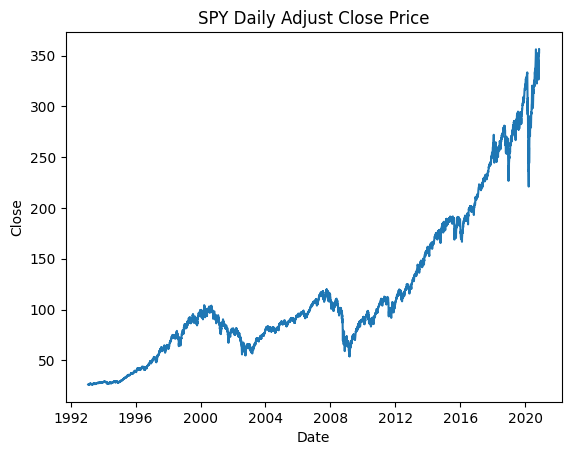

In [39]:
# Plot history of adjusted close price of SPY
sns.lineplot(x = spy.Date, y=spy['Close'])
plt.title('SPY Daily Adjust Close Price')
plt.savefig('SPY Daily Adjust Close Price')

Text(0.5, 1.0, 'DIA Daily Adjust Close Price')

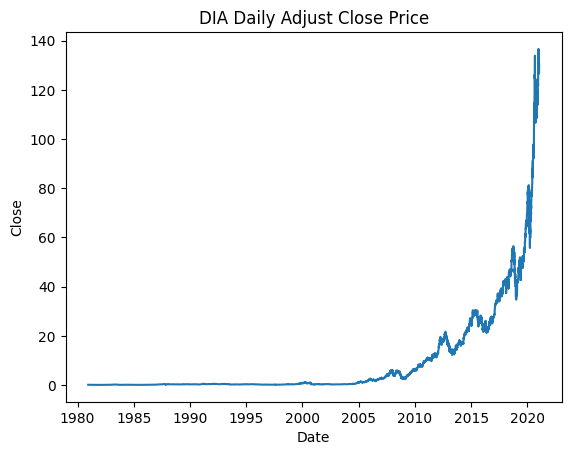

In [40]:
# Plot history of adjusted close price of SPY
sns.lineplot(x = dia.Date, y=dia['Close'])
plt.title('DIA Daily Adjust Close Price')

In [41]:
# Validate there is no duplicate dates
print(spy.index.is_unique)
print(dia.index.is_unique)
print(qqq.index.is_unique)

True
True
True


### Exclude 2020 Data
For this excersise, and probably this entire project, we will only be using data up until Dec 31, 2019. This will give us a good complete yearly picture since we are not yet done with 2020.

In [42]:
# Edit spy dataframe taking out all 2020 points
spy = spy.loc[spy.Date.dt.year < 2020]

# Edit dia dataframe taking out all 2020 points
dia = dia.loc[dia.Date.dt.year < 2020]

# Edit dia dataframe taking out all 2020 points
qqq = qqq.loc[qqq.Date.dt.year < 2020]

### Calculate Returns and View Distributions

It is better to make predictions of returns versus stock price. This is because a 2% gain on a 100 dollar stock is not the same as a 2% gain on a 10 dollar stock. Stock returns are stationary in the fact that the magnitude is always in the same relative range. We will do a distribution plot further in the notebook.

In [43]:
# compute daily return
spy["day_return"] = spy["Close"].pct_change()
dia["day_return"] = dia["Close"].pct_change()

# compute daily log return
spy['log_day_return'] = np.log(spy['Close']) - np.log(spy['Close'].shift(1))
dia['log_day_return'] = np.log(dia['Close']) - np.log(dia['Close'].shift(1))

# Drop first row as the newly calculated columns will be N/A due to no previous data
spy = spy.iloc[1:]
dia = dia.iloc[1:]

# Check out dataframe
spy.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_return,log_day_return
6775,2019-12-24,316.92,316.97,316.36,316.69,20270000,0.0,0,0.000032,0.000032
6776,2019-12-26,317.10,318.38,317.09,318.37,30911200,0.0,0,0.005305,0.005291
6777,2019-12-27,319.16,319.22,317.72,318.29,42528800,0.0,0,-0.000251,-0.000251
6778,2019-12-30,318.38,318.53,316.01,316.54,49729100,0.0,0,-0.005498,-0.005513
6779,2019-12-31,316.00,317.57,315.62,317.31,57077300,0.0,0,0.002433,0.002430


# Visualizing our Data

mean      0.000434
median    0.000662
min      -0.098541
max       0.145105
var       0.000130
std       0.011422
Name: day_return, dtype: float64


C:\Users\karth\AppData\Local\Temp\ipykernel_13768\4283445317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spy['day_return'])


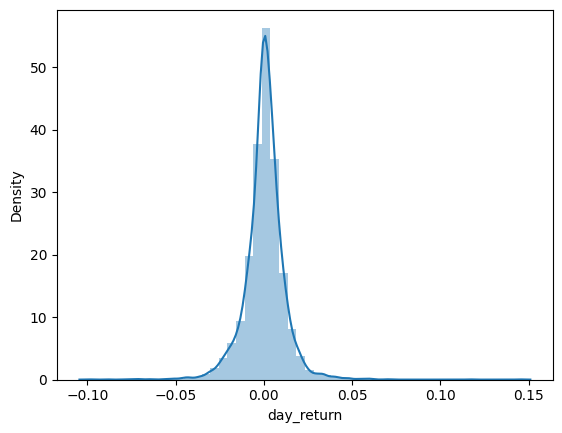

In [44]:
# print out daily return of the close adjusted price
sns.distplot(spy['day_return'])
print(spy['day_return'].agg(['mean','median','min','max','var', 'std']))

**DIA distribution**
- Normal-ish distribution. High Kurtosis we will measure. (normal distribution mean = 0 std = 1)
- Largest percent gain is 13.5% in one day
- Largest loss in a day is -9%
- Standard dev (volatility) is slightly larger than S&P500 probably due to less diversification


C:\Users\karth\AppData\Local\Temp\ipykernel_13768\1552590062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia['day_return'])


mean      0.001278
median    0.000000
min      -0.512195
max       0.333333
var       0.001209
std       0.034768
Name: day_return, dtype: float64


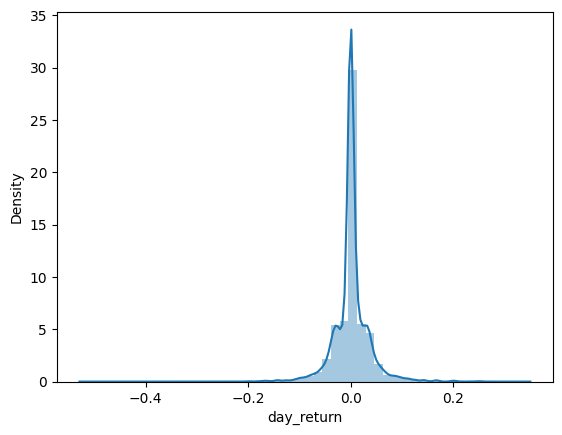

In [45]:
# show daily return
sns.distplot(dia['day_return'])
print(dia['day_return'].agg(['mean', 'median', 'min','max','var', 'std']))

### Day of the Week Return Analysis
Ever wondered what day of the week offers the best upside? Does it always feel like friday has the buy button engaged after lunch and everyone takes off? Lets check.

In [46]:
# Create weekday column and map corresponding number output to real name
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
spy['weekday'] = spy['Date'].dt.dayofweek.map(dayOfWeek)
dia['weekday'] = dia['Date'].dt.dayofweek.map(dayOfWeek)

spy.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_return,log_day_return,weekday
1,1993-02-01,26.10,26.27,26.10,26.27,480500,0.0,0,0.007285,0.007259,Monday
2,1993-02-02,26.25,26.34,26.19,26.32,201300,0.0,0,0.001903,0.001902,Tuesday
3,1993-02-03,26.36,26.62,26.34,26.60,529400,0.0,0,0.010638,0.010582,Wednesday
4,1993-02-04,26.69,26.77,26.39,26.71,531500,0.0,0,0.004135,0.004127,Thursday
5,1993-02-05,26.69,26.75,26.54,26.69,492100,0.0,0,-0.000749,-0.000749,Friday


<Axes: xlabel='weekday', ylabel='day_return'>

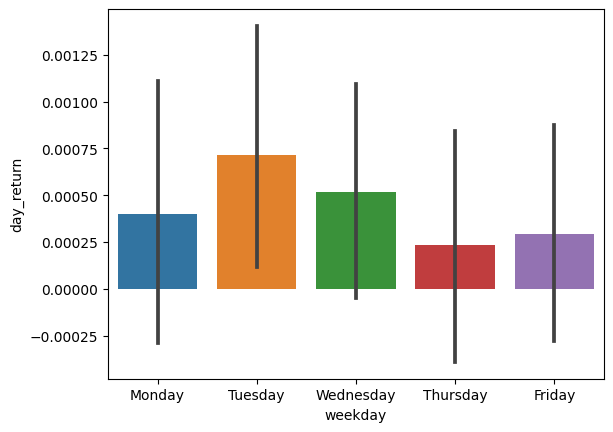

In [47]:
# Create SPY Barplot Showing 1 Day Return %
sns.barplot(x="weekday", y="day_return", data=spy)

<Axes: xlabel='weekday', ylabel='day_return'>

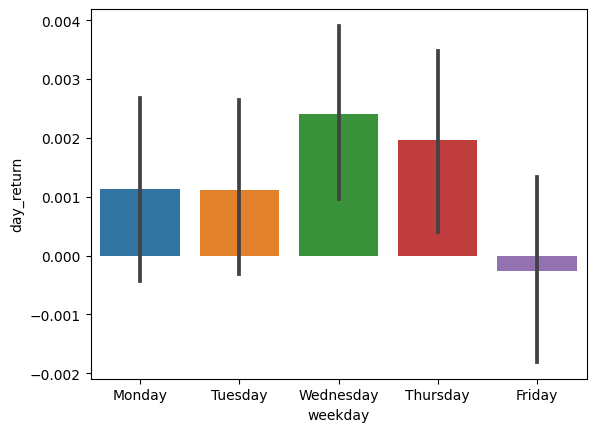

In [48]:
# Create DIA Barplot Showing 1 Day Return %
sns.barplot(x="weekday", y="day_return", data=dia)

#### Conclusions
The two ETFs appear to behave very differently when looking at the returns for which day of the week it is. The DIA seems to not really care what day it ism

- Spy: Very interesting finds here. The SPY's best day is overwhelmingly Tuesday. It is almost as if Tuesday does not go down. The error bars are completely positive. Monday is the most volatile

### Seasonal Trend Decomposition Plots

#### Two types of data from Trend Decomposition Plots
1. Systematic: Components of the time series that can be modeled due to their consistency
2. Non-Systematic: Components of the time series that are impossible to estimate/model

All time series data have 3 **systematic components called level, trend, seasonality**, and one **non-systematic component called noise.**

There are two types of time series:
1. Additive
2. Multiplicative

**Additive**<br/>
Useful when trend and seasonal data is relatively constant overtime. This means the graphs looks linear.<br/>
- *Target(t) = Level + Trend + Seasonality + Noise*

**Multiplicative**<br/>
Useful when the trend and seasonal variation increases/decreases in magnitude over time. This can be seen by observing a  curved trend line. Non-linear seasonality is observed by noting increased distance from peak to trough of seasonality graphs or increased frequency of peak to trough within a period.<br/>
- *Target(t) = Level * Trend * Seasonality * Noise*


In [49]:
stl_spy = spy
stl_spy = stl_spy.set_index('Date')
stl_spy = stl_spy.resample('M').last()
stl_spy = stl_spy['Close']

In [50]:
spy['Close'].head()

1    26.27
2    26.32
3    26.60
4    26.71
5    26.69
Name: Close, dtype: float64

In [51]:
# seasonal_trend_decomp_plot(dataframe = spy,
#                            target_series = 'Close',
#                            freq = 'M',
#                            seasonal_smoother = 13,
#                            period = 12)

**Conclusion**<br/>
Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

- The trend looks to be nonlinear
- The seasonality looks to multiplicative as the frequency increases and the magnitude increases
- You can see the error (residuals) really begin to increase at the start of 2017

## Autocorrelation

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

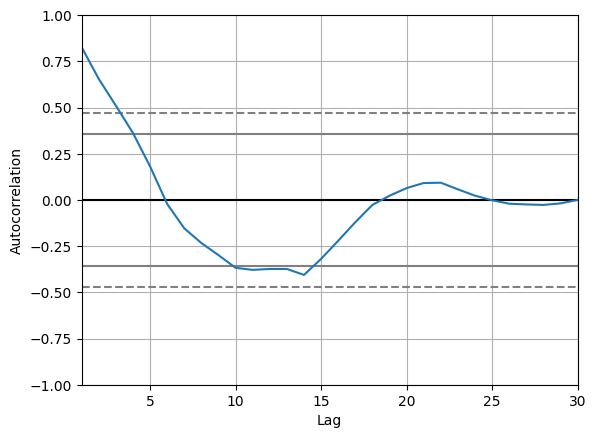

In [52]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation for SPY
autocorrelation_plot(spy['Close'][:30])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

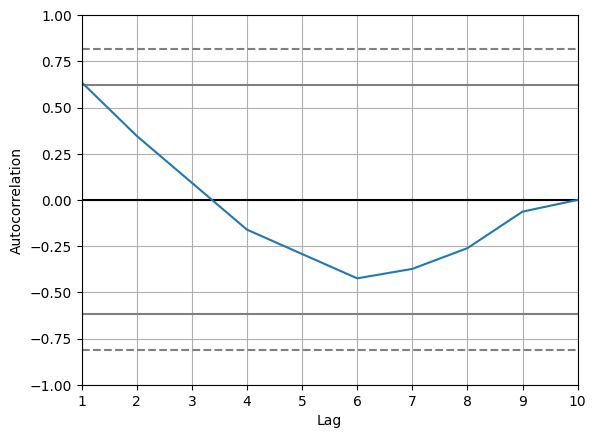

In [53]:
# Plot autocorrelation for DIA
autocorrelation_plot(dia['Close'][:10])

**Conlcusion**

- Seems to be positive until about 1750 day lag
- the earlier more recent the point the better the correlation
- No need to do anywhere the amount of lags we did. Need to focus earlier on

### Lets Test first 10 days

In [54]:
# Establish empty list for for-loop
spy_autocorr = []

# Loop through lag numbers to find the point with highest autocorrelation
for x in list(range(1,101)):
    spy_autocorr.append(spy['Close'].autocorr(lag=x))

# Show the index of the point with the largest autocorrelation value
# 0 indexed so add 1 for correct number of lags
lags = spy_autocorr.index(max(spy_autocorr)) + 1 
print('The best performing lag is number {}'.format(lags))

The best performing lag is number 1


**Conclusion**

No need to do this for the DIA as well. This turned out exactly like our previous graph showed. An almost linear relationship with decreasing autocorrelation until around lag 2000. This means that the previous day is the best day to use to predict the next days price. However, with the average % change from the day before being almost 0, its not a very good indicator.

### Arima Model

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6779
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11015.374
Date:                Sun, 26 Mar 2023   AIC                          22042.747
Time:                        23:27:55   BIC                          22083.676
Sample:                             0   HQIC                         22056.874
                               - 6779                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0431      0.007     -6.554      0.000      -0.056      -0.030
ar.L2         -0.0447      0.006     -7.176      0.000      -0.057      -0.032
ar.L3          0.0048      0.007      0.736      0.4

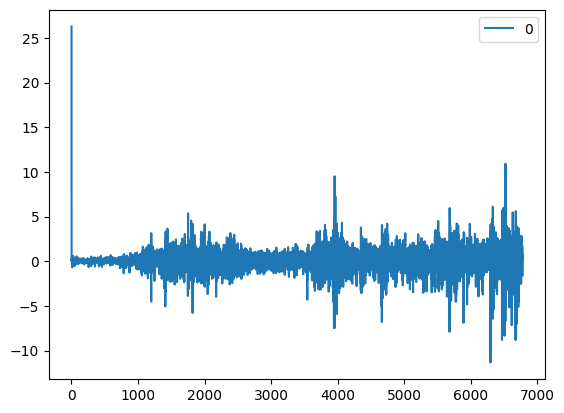

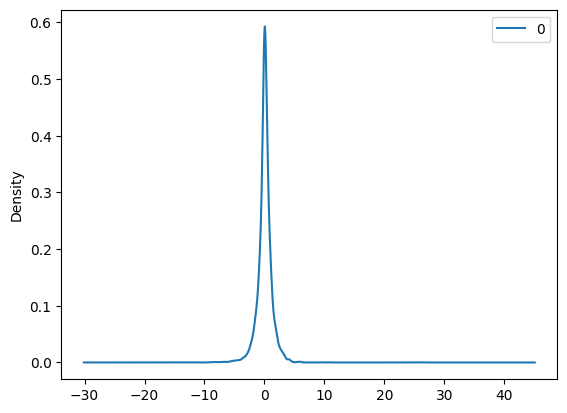

                 0
count  6779.000000
mean      0.052737
std       1.268682
min     -11.323586
25%      -0.395603
50%       0.067162
75%       0.569707
max      26.270000


In [57]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
spy_model = ARIMA(spy['Close'], order=(5,1,0))
spy_model_fit = spy_model.fit()
print(spy_model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(spy_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [61]:
# spy = pd.read_csv('SPY.csv')
# spy['Date'] = pd.to_datetime(spy['Date'])

c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


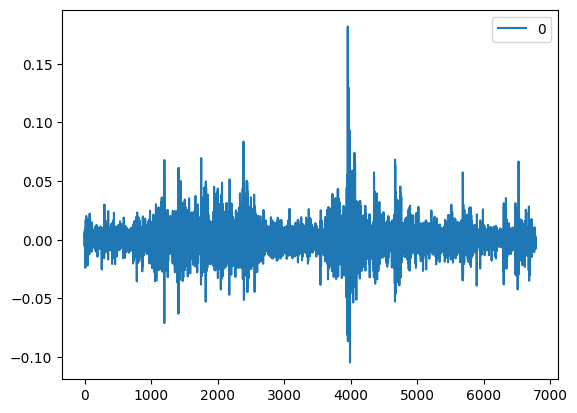

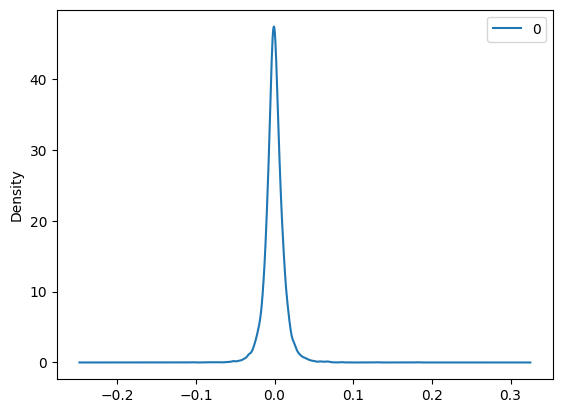

                 0
count  6779.000000
mean     -0.000002
std       0.012443
min      -0.104663
25%      -0.005916
50%      -0.000358
75%       0.005723
max       0.181891


In [65]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
spy_model = ARIMA(spy['day_return'], order=(5,1,0))
spy_model_fit = spy_model.fit()
print(spy_model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(spy_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_day_return   No. Observations:                 6779
Model:                 ARIMA(5, 1, 0)   Log Likelihood               20119.452
Date:                Sun, 26 Mar 2023   AIC                         -40226.903
Time:                        23:32:11   BIC                         -40185.975
Sample:                             0   HQIC                        -40212.777
                               - 6779                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8699      0.007   -124.321      0.000      -0.884      -0.856
ar.L2         -0.7301      0.009    -84.161      0.000      -0.747      -0.713
ar.L3         -0.5309      0.010    -55.154      0.0

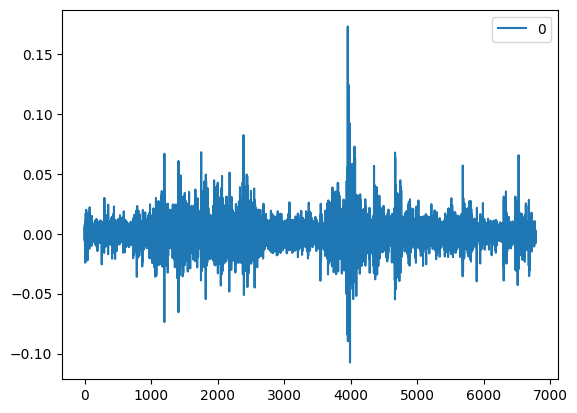

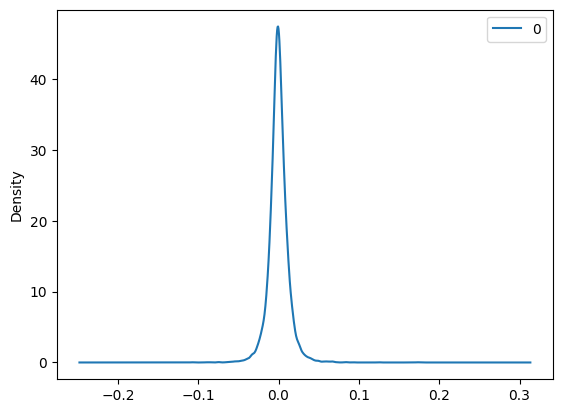

                 0
count  6779.000000
mean     -0.000002
std       0.012434
min      -0.107476
25%      -0.005894
50%      -0.000320
75%       0.005762
max       0.173165


In [63]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
spy_model = ARIMA(spy['log_day_return'], order=(5,1,0))
spy_model_fit = spy_model.fit()
print(spy_model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(spy_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sma_3   No. Observations:                 6779
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4465.428
Date:                Sun, 26 Mar 2023   AIC                           8942.856
Time:                        23:32:12   BIC                           8983.785
Sample:                             0   HQIC                          8956.983
                               - 6779                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8332      0.007    122.381      0.000       0.820       0.847
ar.L2         -0.0558      0.009     -6.288      0.000      -0.073      -0.038
ar.L3         -0.4842      0.008    -61.991      0.0

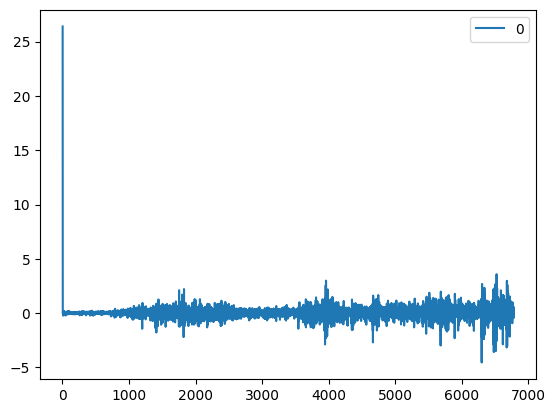

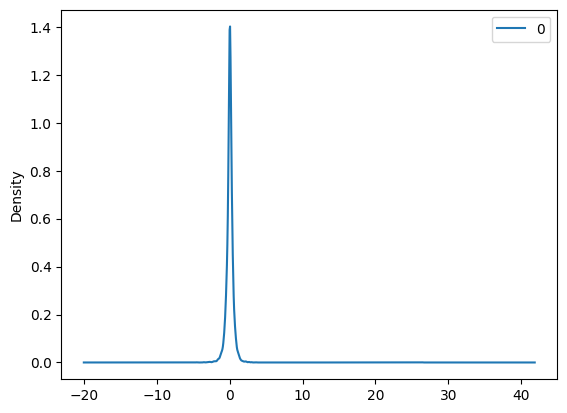

                 0
count  6777.000000
mean      0.022196
std       0.566159
min      -4.548351
25%      -0.161167
50%       0.027465
75%       0.225009
max      26.396667


In [64]:
spy['sma_3'] = spy.Close.rolling(window=3).mean()
from statsmodels.tsa.arima.model import ARIMA

# fit model
spy_model = ARIMA(spy['sma_3'], order=(5,1,0))
spy_model_fit = spy_model.fit()
print(spy_model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(spy_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [69]:
spy.count()

Date              6779
Open              6779
High              6779
Low               6779
Close             6779
Volume            6779
Dividends         6779
Stock Splits      6779
day_return        6779
log_day_return    6779
weekday           6779
sma_3             6777
dtype: int64